[View in Colaboratory](https://colab.research.google.com/github/ShujuShi/hello-github/blob/master/over_under_fitting.ipynb)

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
NUM_WORDS=10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [4]:
tf.keras.__version__

'2.1.6-tf'

In [0]:
def multi_hot_sequences(sequences, dimension):
  results=np.zeros((len(sequences),dimension))
  for i, word_indices in enumerate(sequences):
    results[i,word_indices]=1.0
    return results
  
  
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

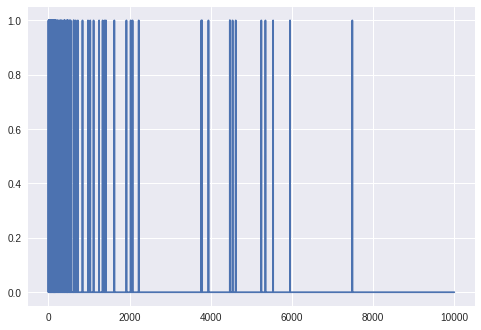

In [28]:
plt.plot(train_data[0])

In [29]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer = 'adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [30]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6932 - acc: 0.4966 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 2/20
 - 4s - loss: 0.6931 - acc: 0.4972 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 3/20
 - 4s - loss: 0.6931 - acc: 0.4999 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 4/20
 - 4s - loss: 0.6931 - acc: 0.4955 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 5/20
 - 4s - loss: 0.6931 - acc: 0.4991 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 6/20
 - 4s - loss: 0.6931 - acc: 0.5000 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 7/20
 - 4s - loss: 0.6931 - acc: 0.4971 - binary_crossentropy:

In [31]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [32]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6932 - acc: 0.4995 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 2/20
 - 4s - loss: 0.6932 - acc: 0.4969 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 3/20
 - 4s - loss: 0.6932 - acc: 0.5000 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 4/20
 - 4s - loss: 0.6931 - acc: 0.5001 - binary_crossentropy: 0.6931 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 5/20
 - 4s - loss: 0.6931 - acc: 0.5000 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 6/20
 - 4s - loss: 0.6931 - acc: 0.4920 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 7/20
 - 4s - loss: 0.6931 - acc: 0.5000 - binary_crossentropy:

In [33]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [34]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 20s - loss: 0.6932 - acc: 0.4994 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 2/20
 - 19s - loss: 0.6931 - acc: 0.4970 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 3/20
 - 19s - loss: 0.6932 - acc: 0.4984 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 4/20
 - 19s - loss: 0.6931 - acc: 0.5000 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 5/20
 - 19s - loss: 0.6931 - acc: 0.4981 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 6/20
 - 19s - loss: 0.6931 - acc: 0.4991 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 7/20
 - 20s - loss: 0.6931 - acc: 0.4952 - binary_crosse

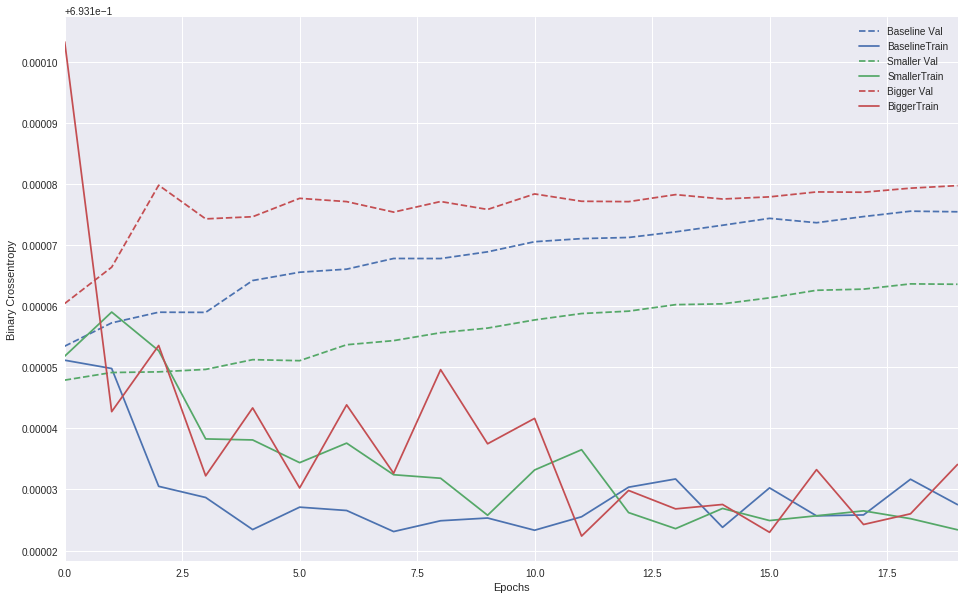

In [35]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val=plt.plot(history.epoch, history.history['val_'+key],
                '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key],color=val[0].get_color(),
            label=name.title()+'Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [36]:
l2_model =keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, 
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.7118 - acc: 0.5000 - binary_crossentropy: 0.6932 - val_loss: 0.7046 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 2/20
 - 4s - loss: 0.7027 - acc: 0.4960 - binary_crossentropy: 0.6932 - val_loss: 0.7010 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 3/20
 - 4s - loss: 0.6997 - acc: 0.4972 - binary_crossentropy: 0.6931 - val_loss: 0.6985 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 4/20
 - 4s - loss: 0.6976 - acc: 0.4962 - binary_crossentropy: 0.6932 - val_loss: 0.6967 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 5/20
 - 4s - loss: 0.6961 - acc: 0.4938 - binary_crossentropy: 0.6932 - val_loss: 0.6955 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 6/20
 - 4s - loss: 0.6951 - acc: 0.4978 - binary_crossentropy: 0.6932 - val_loss: 0.6947 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 7/20
 - 4s - loss: 0.6944 - acc: 0.4962 - binary_crossentropy:

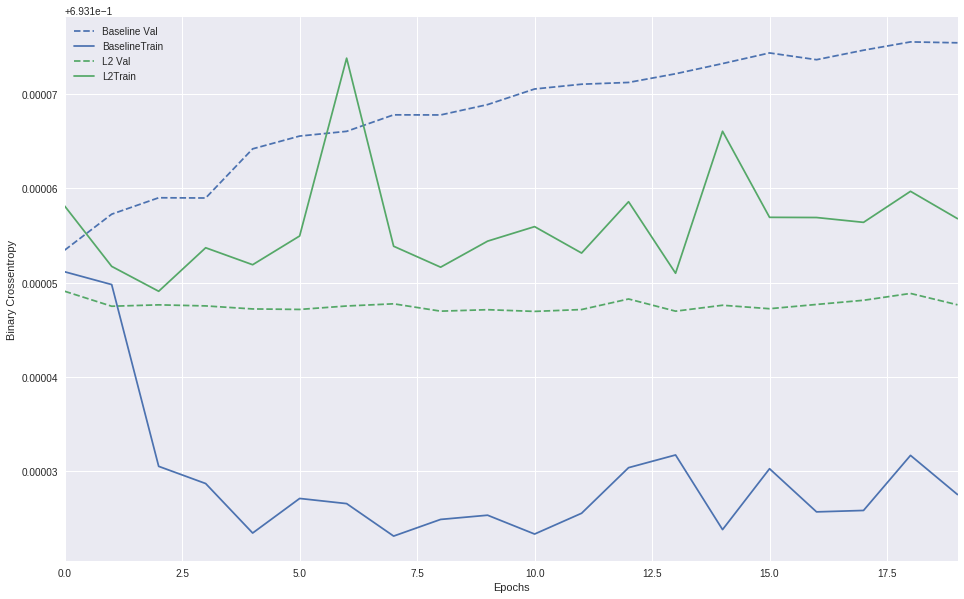

In [37]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [38]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)



Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6932 - acc: 0.5000 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 2/20
 - 4s - loss: 0.6932 - acc: 0.4967 - binary_crossentropy: 0.6932 - val_loss: 0.6931 - val_acc: 0.5000 - val_binary_crossentropy: 0.6931
Epoch 3/20
 - 4s - loss: 0.6932 - acc: 0.4979 - binary_crossentropy: 0.6932 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 4/20
 - 4s - loss: 0.6931 - acc: 0.4982 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 5/20
 - 4s - loss: 0.6931 - acc: 0.4956 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 6/20
 - 4s - loss: 0.6931 - acc: 0.4955 - binary_crossentropy: 0.6931 - val_loss: 0.6932 - val_acc: 0.5000 - val_binary_crossentropy: 0.6932
Epoch 7/20
 - 4s - loss: 0.6932 - acc: 0.4959 - binary_crossentropy:

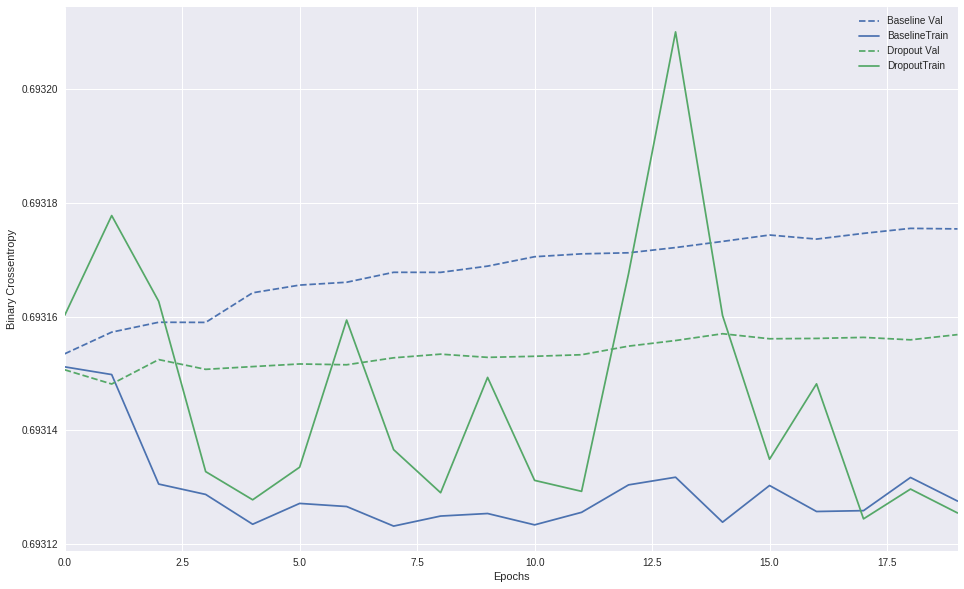

In [39]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])